<a href="https://colab.research.google.com/github/nadgir-praveen/data-science-lab/blob/main/mini_projects/AB_M2_NB_MiniProject_3_Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1kGJfpEC9dayjApciCYZr04NWT7XWkRhV/view?usp=sharing) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


## Grading = 10 Points

In [ ]:
#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")

Datasets downloaded successfully!


### Import Neccesary Packages

In [ ]:
import librosa
import librosa.display
import soundfile as sf
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript, Audio, display
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
import random
from collections import defaultdict

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import randint

### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

In [ ]:
tess_directory = "/content/Tess"
ravdess_directory = "/content/ravdess"

In [ ]:
# Define patterns to match audio files in both datasets
tess_pattern = f"{tess_directory}/**/*.wav"
ravdess_pattern = f"{ravdess_directory}/**/*.wav"

# Use glob.glob to get lists of file paths matching the patterns
tess_audio_files = glob.glob(tess_pattern, recursive=True)
ravdess_audio_files = glob.glob(ravdess_pattern, recursive=True)

# Print the first few file paths as an example
print("TESS Audio Files:")
print(tess_audio_files[:5])

print("\nRAVDESS Audio Files:")
print(ravdess_audio_files[:5])

TESS Audio Files:
['/content/Tess/YAF_sad/YAF_rough_sad.wav', '/content/Tess/YAF_sad/YAF_mess_sad.wav', '/content/Tess/YAF_sad/YAF_deep_sad.wav', '/content/Tess/YAF_sad/YAF_vine_sad.wav', '/content/Tess/YAF_sad/YAF_chalk_sad.wav']

RAVDESS Audio Files:
['/content/ravdess/Actor_16/03-01-07-01-01-02-16_disgust.wav', '/content/ravdess/Actor_16/03-01-03-02-02-01-16_happy.wav', '/content/ravdess/Actor_16/03-01-05-02-01-02-16_angry.wav', '/content/ravdess/Actor_16/03-01-01-01-02-02-16_neutral.wav', '/content/ravdess/Actor_16/03-01-06-02-01-02-16_fear.wav']


In [ ]:
# Combine the lists
all_audio_files = tess_audio_files + ravdess_audio_files

#### Play the sample audio

In [ ]:
# Function with the actual logic to extract emotion from your filenames
def extract_emotion_from_filename(file_path):
    # Identify RAVDESS filenames
    if "ravdess" in file_path.lower():
        parts = os.path.splitext(os.path.basename(file_path))[0].split('-')
        if len(parts) >= 4:
            emotion_code = parts[2]
            # Add your mapping or logic to convert emotion code to text
            emotion_mapping = {
                '01': 'neutral',
                '02': 'calm',
                '03': 'happy',
                '04': 'sad',
                '05': 'angry',
                '06': 'fear',
                '07': 'disgust',
                '08': 'surprised',
            }
            emotion_text = emotion_mapping.get(emotion_code, 'unknown')
            return emotion_text

    # Identify TESS filenames
    elif "tess" in file_path.lower() or "team11" in file_path.lower():
        parts = os.path.splitext(os.path.basename(file_path))[0].split('_')

        if len(parts) >= 2:
            emotion_text = parts[2]
            return emotion_text

    # Return 'unknown' if neither RAVDESS nor TESS is detected in the file path
    return 'unknown'

In [ ]:
def fetch_file_by_emotion(emotion):
    random.shuffle(all_audio_files)
    for file_path in all_audio_files:
        # Extract emotion from filename (customize this based on your filename structure)
        emotion_from_filename = extract_emotion_from_filename(file_path)

        # Check if the extracted emotion matches the desired emotion
        if emotion_from_filename == emotion:
            return file_path

    # Return None if no match is found
    return None

In [ ]:
# Example: Fetch a file for the 'fear' emotion randomly from the all_audio_files
desired_emotion = 'surprised'
file_for_emotion = fetch_file_by_emotion(desired_emotion)
print(file_for_emotion)

/content/Tess/OAF_surprised/OAF_date_surprised.wav


In [ ]:
# YOUR CODE HERE
# Play each audio file
# Load the sample audio file
y, sr = librosa.load(file_for_emotion)

# Play the audio
ipd.Audio(y, rate=sr)

### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

{'angry': 561, 'disgust': 571, 'fear': 561, 'happy': 557, 'neutral': 466, 'sad': 562, 'surprised': 569}


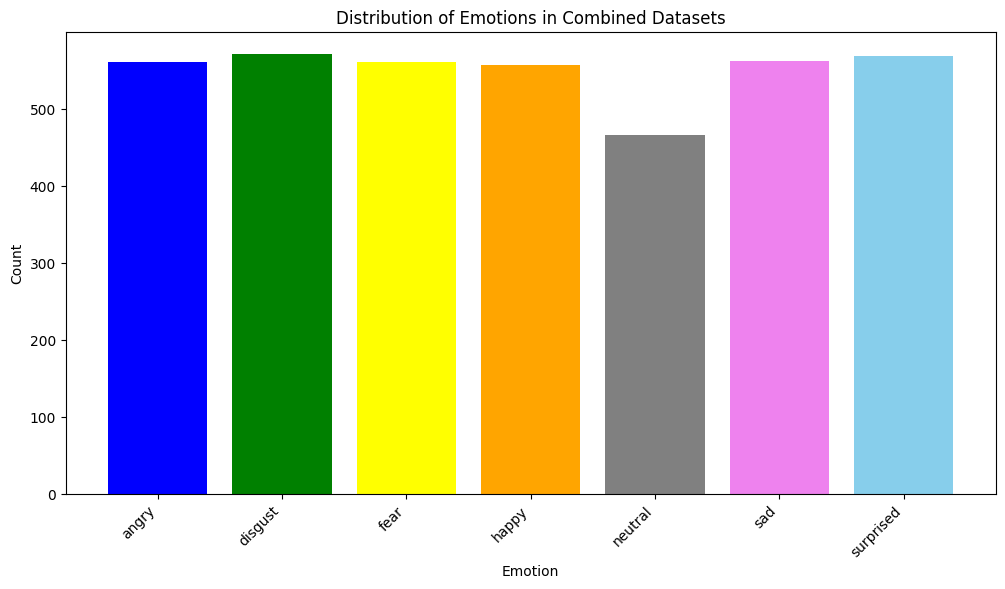

In [ ]:
# YOUR CODE HERE
# Extract emotions from the file paths
emotions = [extract_emotion_from_filename(file_path) for file_path in all_audio_files]

# Count the occurrences of each emotion
emotion_count = defaultdict(int)
for emotion in emotions:
    emotion_count[emotion] += 1

# Sort the dictionary by emotion category for consistent plotting
sorted_emotion_count = dict(sorted(emotion_count.items()))
print(sorted_emotion_count)
# Plot the distribution as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_emotion_count.keys(), sorted_emotion_count.values(), color = ['blue','green','yellow','orange','grey','violet','skyblue'])
plt.title('Distribution of Emotions in Combined Datasets')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Visualize sample audio signal using librosa

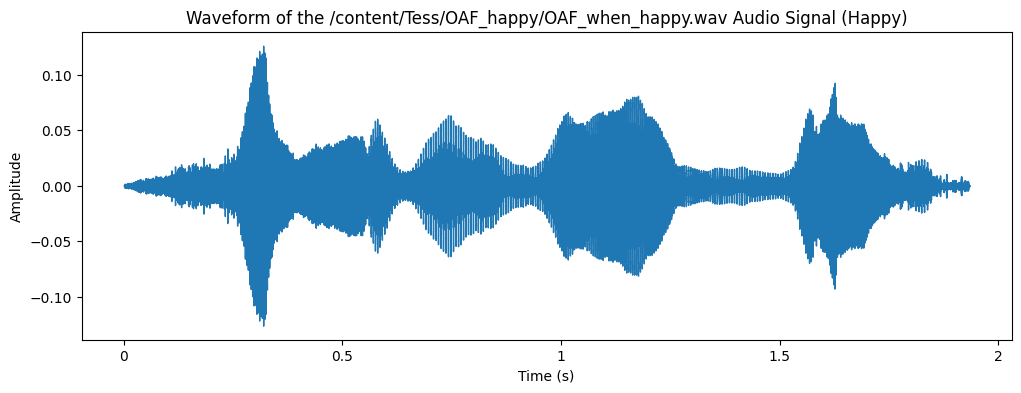

In [ ]:
# YOUR CODE HERE
# Choose an emotion category (e.g., 'angry', 'happy', 'sad', etc.)
desired_emotion = 'happy'
file_for_emotion = fetch_file_by_emotion(desired_emotion)

# Load the sample audio file
y, sr = librosa.load(file_for_emotion)

# Plot the audio signal
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform of the {file_for_emotion} Audio Signal ({desired_emotion.capitalize()})')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

In [ ]:
# YOUR CODE HERE
def extract_feature(file_name):
    # load audio
    X, sample_rate = librosa.load(file_name)
    # apply stft()
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    # compute mfcc
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    # combine the features
    result=np.hstack((result, mfccs))
    # compute chroma features and combine
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    # compute melspectrogram and combine
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [ ]:
desired_emotion = 'sad'
file_for_emotion = fetch_file_by_emotion(desired_emotion)
sample_feature = extract_feature(file_for_emotion) #,mfcc=True, chroma=True, mel=True)
sample_feature.shape

(180,)

#### Create a dictionary or a function to encode the emotions

In [ ]:
# YOUR CODE HERE
emotion_encoding = {
    'neutral': 0,
    'calm': 1,
    'happy': 2,
    'sad': 3,
    'angry': 4,
    'fear': 5,
    'disgust': 6,
    'surprised': 7,
    'unknown': 8  # You can assign a numerical label for 'unknown' if needed
}

In [ ]:
# Function to encode emotion into numerical label
def encode_emotion(emotion):
    return emotion_encoding.get(emotion, emotion_encoding['unknown'])

In [ ]:
# Example: Encode the emotions from the all_audio_files list
encoded_emotions = [encode_emotion(extract_emotion_from_filename(file_path)) for file_path in all_audio_files]

# Print the first few encoded emotions as an example
print("Encoded Emotions:")
print(encoded_emotions[:10])

Encoded Emotions:
[3, 3, 3, 4, 3, 6, 0, 2, 7, 0]


#### TESS data feature extraction

In [ ]:
# YOUR CODE HERE
tess_features, tess_labels = [], []

for wv_file in tess_audio_files:
  tess_features.append(extract_feature(wv_file))
  # extracting label
  emt = extract_emotion_from_filename(wv_file)
  tess_labels.append(emotion_encoding[emt.lower()])

#### Ravdess data feature extraction

In [ ]:
# YOUR CODE HERE
ravdess_features, ravdess_labels = [], []

for wv_file in ravdess_audio_files:
  ravdess_features.append(extract_feature(wv_file))
  # extracting label
  emt = extract_emotion_from_filename(wv_file)
  ravdess_labels.append(emotion_encoding[emt.lower()])

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [ ]:
# YOUR C# Convert lists to NumPy arrays
features_array = np.array(tess_features)
labels_array = np.array(tess_labels)
# Combine features and labels into a single NumPy array
combined_array = np.column_stack((labels_array, features_array))
# Create a DataFrame
columns = ['emotion'] + [f'mfcc_{i}' for i in range(features_array.shape[1])]
tess_df = pd.DataFrame(combined_array, columns=columns)

# Save the DataFrame as a CSV file
csv_filename = '/content/Tess/tess_features_labels.csv'
tess_df.to_csv(csv_filename, index=False)

print(f'TESS features and labels saved to {csv_filename}')

TESS features and labels saved to /content/Tess/tess_features_labels.csv


In [ ]:
# YOUR C# Convert lists to NumPy arrays
features_array = np.array(ravdess_features)
labels_array = np.array(ravdess_labels)
# Combine features and labels into a single NumPy array
combined_array = np.column_stack((labels_array, features_array))
# Create a DataFrame
columns = ['emotion'] + [f'mfcc_{i}' for i in range(features_array.shape[1])]
ravdess_df = pd.DataFrame(combined_array, columns=columns)

# Save the DataFrame as a CSV file
csv_filename = '/content/ravdess/ravdess_features_labels.csv'
ravdess_df.to_csv(csv_filename, index=False)

print(f'RAVDESS features and labels saved to {csv_filename}')

RAVDESS features and labels saved to /content/ravdess/ravdess_features_labels.csv


In [ ]:
# Combine the DataFrames vertically (along rows)
combined_df = pd.concat([tess_df, ravdess_df], ignore_index=True)

# Save the combined DataFrame as a CSV file
csv_filename_combined = '/content/tess_ravdess_combined.csv'
combined_df.to_csv(csv_filename_combined, index=False)

print(f'Combined TESS and RAVDESS Data saved to {csv_filename_combined}')

Combined TESS and RAVDESS Data saved to /content/tess_ravdess_combined.csv


#### Split the data into train and test

In [ ]:
# YOUR CODE HERE
# Extract features and labels from the DataFrame
X = combined_df.drop('emotion', axis=1)  # Features (remove the 'emotion' column)
y = combined_df['emotion']  # Labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3077, 180)
X_test shape: (770, 180)
y_train shape: (3077,)
y_test shape: (770,)


### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4],
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
dt_model=DecisionTreeClassifier(random_state=42)
skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
# Create a GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=skfold)

In [ ]:
# Fit the GridSearchCV on the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_dt.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
param_grid_rf = {
    'n_estimators': [100,300,600],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
}

In [ ]:
rf_model=RandomForestClassifier(random_state=42)
skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf, scoring='accuracy', cv=skfold)

In [ ]:
# Fit the GridSearchCV on the data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_rf)

KeyboardInterrupt: 

In [ ]:
# YOUR CODE HERE
# Decision Tree Classifier
#best_dt_model = grid_search_dt.best_estimator_
#best_rf_model = grid_search_rf.best_estimator_
best_params = {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10}
decision_tree_model = DecisionTreeClassifier(**best_params,random_state=42)
decision_tree_model.fit(X_train, y_train)

# Random Forest Classifier
best_params_rf = {'n_estimators': 2000, 'min_samples_split': 20, 'max_depth': 20}
random_forest_model = RandomForestClassifier(**best_params_rf,random_state=42)
# Regularized Random Forest Classifier

random_forest_model.fit(X_train, y_train)
random_forest_model.

# Predictions
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Decision Tree Accuracy: 0.7646
Random Forest Accuracy: 0.8499


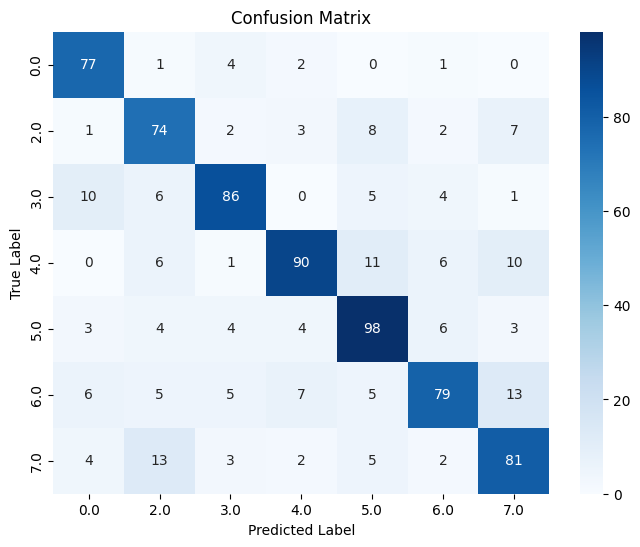

In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

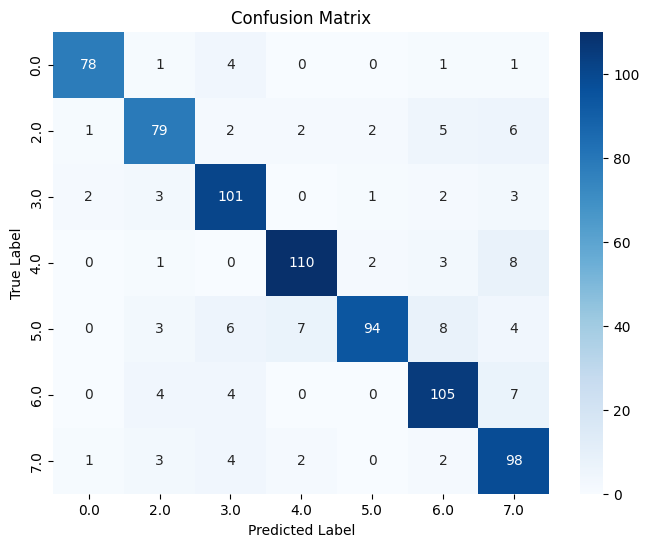

In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Apply the voting classifier

In [ ]:
# YOUR CODE HERE
# Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Logistic Regression Classifier
logistic_regression_model = LogisticRegression(random_state=42)

# Create SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))

# Create KNN model
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

# Create a VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('dt', decision_tree_model),('rf', random_forest_model), ('lr', logistic_regression_model), ('svm', svm_model),
        ('knn', knn_model)],
    voting='hard'  # Use 'hard' for majority voting
)


# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_vc = voting_classifier.predict(X_test)

# Evaluate the VotingClassifier
accuracy_vc = accuracy_score(y_test, y_pred_vc)
print(f"Voting Classifier Accuracy: {accuracy_vc:.4f}")

Voting Classifier Accuracy: 0.8623


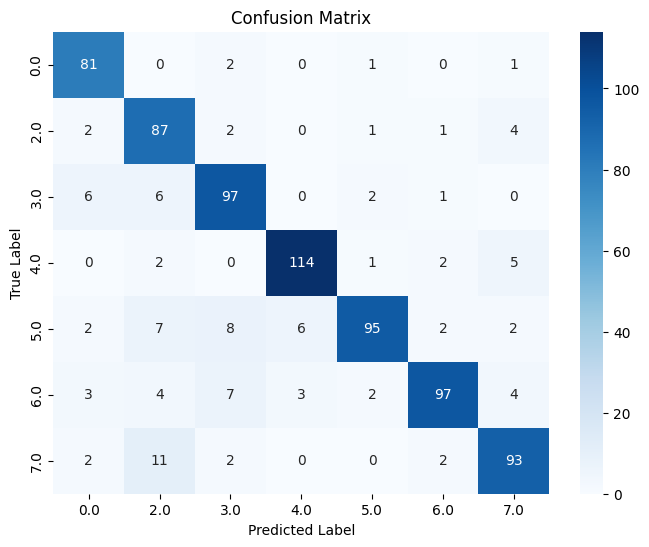

In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_vc)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [ ]:
!unzip -qq Team11.zip

In [ ]:
# YOUR CODE HERE
team_directory = "/content/Team11"
# Define patterns to match audio files in both datasets
team_pattern = f"{team_directory}/**/*.wav"
# Use glob.glob to get lists of file paths matching the patterns
team_audio_files = glob.glob(team_pattern, recursive=True)
# Print the first few file paths as an example
print("TEAM Audio Files:")
print(team_audio_files[:5])

TEAM Audio Files:
['/content/Team11/Team11/Sad/PN_dog_sad.wav', '/content/Team11/Team11/Sad/PN_luck_sad.wav', '/content/Team11/Team11/Sad/AB_hire_sad.wav', '/content/Team11/Team11/Sad/SK_bar_sad.wav', '/content/Team11/Team11/Sad/PJ_bar_sad.wav']


#### Extracting features of team data and combine with TESS + Ravdess

In [ ]:
# YOUR CODE HERE
team_features, team_labels = [], []

for wv_file in team_audio_files:
  team_features.append(extract_feature(wv_file))
  # extracting label
  emt = extract_emotion_from_filename(wv_file)
  team_labels.append(emotion_encoding[emt.lower()])


In [ ]:
print(team_labels)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [ ]:
# YOUR C# Convert lists to NumPy arrays
features_array = np.array(team_features)
labels_array = np.array(team_labels)
# Combine features and labels into a single NumPy array
combined_array = np.column_stack((labels_array, features_array))
# Create a DataFrame
columns = ['emotion'] + [f'mfcc_{i}' for i in range(features_array.shape[1])]
team_df = pd.DataFrame(combined_array, columns=columns)

# Save the DataFrame as a CSV file
csv_filename = '/content/Team11/team_features_labels.csv'
team_df.to_csv(csv_filename, index=False)

In [ ]:
# Combine the DataFrames vertically (along rows)
tess_ravdess_team_df = pd.concat([combined_df, team_df], ignore_index=True)

# Save the combined DataFrame as a CSV file
csv_filename_tess_ravdess_team = '/content/tess_ravdess_team.csv'
tess_ravdess_team_df.to_csv(csv_filename_tess_ravdess_team, index=False)

print(f'Combined TESS and RAVDESS and Team Data saved to {csv_filename_tess_ravdess_team}')

Combined TESS and RAVDESS and Team Data saved to /content/tess_ravdess_team.csv


#### Train the different ML algorithms

In [ ]:
# YOUR CODE HERE
# Extract features and labels from the DataFrame
X = tess_ravdess_team_df.drop('emotion', axis=1)  # Features (remove the 'emotion' column)
y = tess_ravdess_team_df['emotion']  # Labels

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3142, 180)
X_test shape: (786, 180)
y_train shape: (3142,)
y_test shape: (786,)


In [ ]:
dt_model=DecisionTreeClassifier(random_state=42)
skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=skfold)

In [ ]:
# Fit the GridSearchCV on the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
rf_model=RandomForestClassifier(random_state=42)
skfold=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
# Create a RandomSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model,param_distributions=param_grid_rf, scoring='accuracy', cv=skfold)

In [ ]:
# Fit the GridSearchCV on the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = random_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_rf)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
# Decision Tree Classifier
#best_params = {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
#best_dt_model = grid_search.best_estimator_
#best_rf_model = random_search.best_estimator_
decision_tree_model = DecisionTreeClassifier(**best_params,random_state=42)
decision_tree_model.fit(X_train, y_train)

# Random Forest Classifier
#best_params_rf = {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3 }
random_forest_model = RandomForestClassifier(**best_params_rf,random_state=42)
# Regularized Random Forest Classifier

random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Decision Tree Accuracy: 0.7646
Random Forest Accuracy: 0.8626


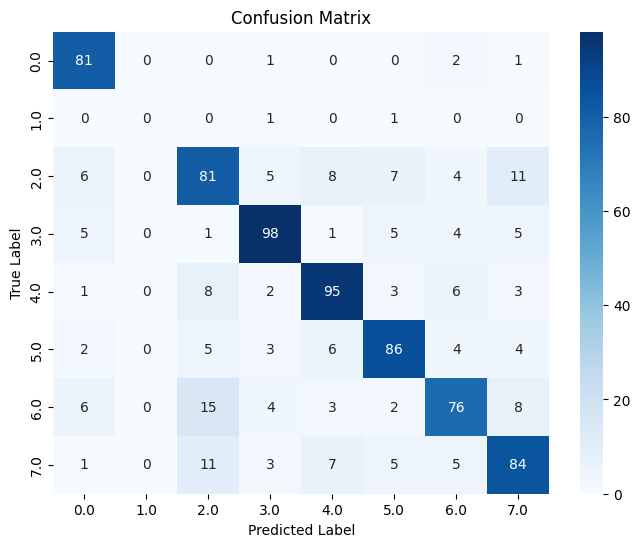

In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

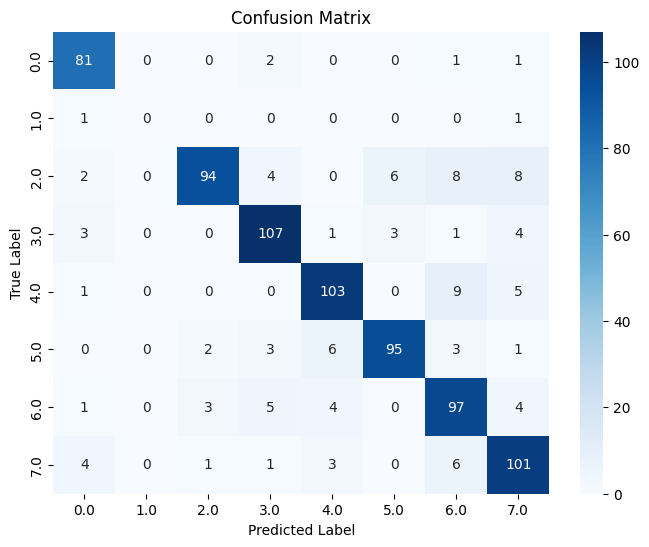

In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# YOUR CODE HERE
# Decision Tree Classifier
decision_tree_model_1 = DecisionTreeClassifier(random_state=42)

# Random Forest Classifier
random_forest_model_1 = RandomForestClassifier(random_state=42)

# Create SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))

# Create KNN model
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

# Logistic Regression Classifier
logistic_regression_model_1 = LogisticRegression(random_state=42)

# Create a VotingClassifier
voting_classifier_1 = VotingClassifier(
    estimators=[('dt', decision_tree_model_1),('rf',random_forest_model_1),('svm', svm_model),
        ('knn', knn_model),('lr', logistic_regression_model_1)],
    voting='hard'  # Use 'hard' for majority voting
)


# Fit the VotingClassifier on the training data
voting_classifier_1.fit(X_train, y_train)

# Make predictions
y_pred_vc = voting_classifier_1.predict(X_test)

# Evaluate the VotingClassifier
accuracy_vc = accuracy_score(y_test, y_pred_vc)
print(f"Voting Classifier Accuracy: {accuracy_vc:.4f}")

Voting Classifier Accuracy: 0.8575


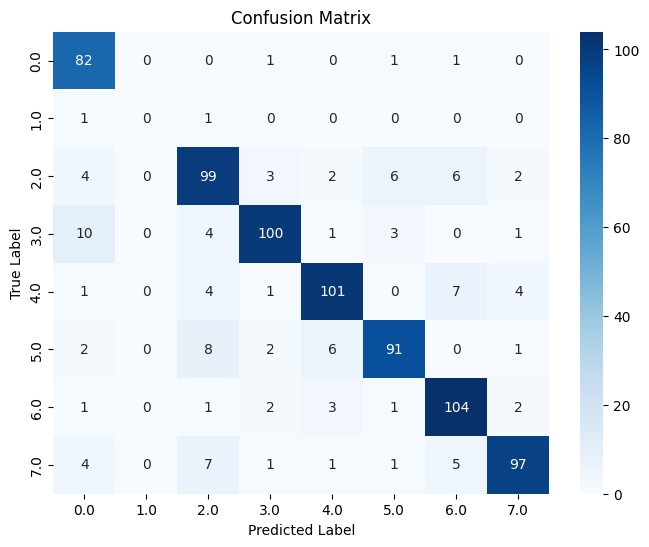

In [ ]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_vc)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Test the best working model with live audio recording

In [ ]:
# choose the best working model and assign below
MODEL = voting_classifier_1

In [ ]:
import pickle
# Save the model to a PKL file
model_filename = '/content/Trained_Model/trained_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(MODEL, model_file)

In [ ]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotion_encoding.values()).index(pred[0])
print(list(emotion_encoding.keys())[idx_emotion])
ipd.Audio(test_i)

Start speaking!


<IPython.core.display.Javascript object>

disgust


In [ ]:
!unzip -qq b7-audio-emotion-classification.zip

In [ ]:
!pip install joblib

In [ ]:
import joblib

In [ ]:
emotion_decoding = {
     0 : 'neutral',
     1 : 'calm',
     2 : 'happy',
     3 : 'sad',
     4 : 'angry',
     5 : 'fear',
     6 : 'disgust',
     7 : 'surprised',
     8 : 'unknown' # You can assign a numerical label for 'unknown' if needed
}

In [ ]:
# Step 1: Load Kaggle Dataset (adjust paths accordingly)
csv_file_path = '/content/Submission/Sample_Submission.csv'
df_labels = pd.read_csv(csv_file_path)

# Step 2: Load Pre-trained Model
model_path = '/content/Trained_Model/trained_model.pkl'  # Adjust path
pretrained_model = joblib.load(model_path)

# Step 3: Extract Features from Audio Files
audio_dir = '/content/Kaggle_Testset/Kaggle_Testset'
audio_filenames = df_labels['Id']  # Assuming column name is 'AudioId'
audio_features = []

for audio_filename in audio_filenames:
  audio_path = f'{audio_dir}/{audio_filename}.wav'
  audio_features.append(extract_feature(audio_path))
  # extracting label
  #emt = extract_emotion_from_filename(audio_path)


# Step 4: Preprocess the Features if needed

# Step 5: Make Predictions
predictions = pretrained_model.predict(audio_features)
decoded_predictions = [emotion_decoding[prediction] for prediction in predictions]
# Step 6: Save Predictions to CSV
output_df = pd.DataFrame({'Id': audio_filenames, 'Label': decoded_predictions})
output_df.to_csv('/content/Submission/Team11_Submission_f.csv', index=False)

### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).
